In [1]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('src/clean_adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30689,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,United-States,<=50K
30690,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,United-States,<=50K
30691,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,United-States,>50K
30692,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,United-States,<=50K


In [3]:
label_encoder = LabelEncoder()

categorical_cols = ['income', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['income']), data['income'], test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [7]:
y_pred = logistic_reg.predict(x_test)

In [8]:
# ACCURACY SCORE
accuracy_score(y_test, y_pred)

0.8247271542596514

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4699
           1       0.70      0.45      0.54      1440

    accuracy                           0.82      6139
   macro avg       0.77      0.69      0.72      6139
weighted avg       0.81      0.82      0.81      6139


<Axes: >

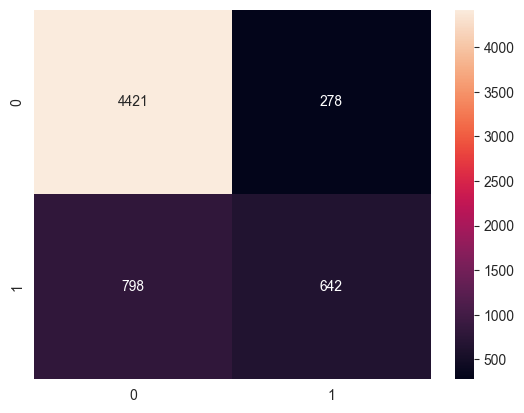

In [10]:
# CONFUSION MATRIX
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')